# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Цель работы: изучить и описать связь цены квартиры и её харктеристик: квадратуры, жилплощади, удалённости от центра и т.д.

Для изучения представлены следующие данные по недвижимости:
- расстояние до ближайшего аэропорта в метрах (м);
- число балконов;
- высота потолков (м);
- расстояние до центра города (м);
- сколько дней было размещено объявление (от публикации до снятия);
- дата публикации;
- этаж;
- всего этажей в доме;
- является ли квартира апартаментами;
- площадь кухни в квадратных метрах;
- цена на момент снятия с публикации;
- жилая площадь в квадратных метрах;
- название населённого пункта;
- свободная ли у квартиры планировка;
- число парков в радиусе 3 км;
- расстояние до ближайшего парка (м);
- число водоёмов в радиусе 3 км;
- расстояние до ближайшего водоёма (м);
- число комнат;
- является ли квартира студией;
- общая площадь квартиры в квадратных метрах;
- число фотографий квартиры в объявлении.

План работы:
1. Провести предобработку данных:
    1. Изучить названия столбцов данных;
    2. Заполнить пропуски;
    3. Привести данные к нужному формату;
    4. Исправить или исключить аномальные значения.
1. Провести анализ данных:
    1. Добавить новые столбцы в общую таблицу;
    1. Исследовать полученные данные;
    1. Определить наиболее значимые факторы, влияющие на продажу квартиры.
1. Сделать выводы.

## Откроем файл с данными и изучим общую информацию. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
original_data_shape = data.shape[0]

Изучим общую информацию полученного датафрейма, выведем первые 10 строк и построем гистограмму для каждого числового столбца:

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
pd.set_option('display.max_columns', None)
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


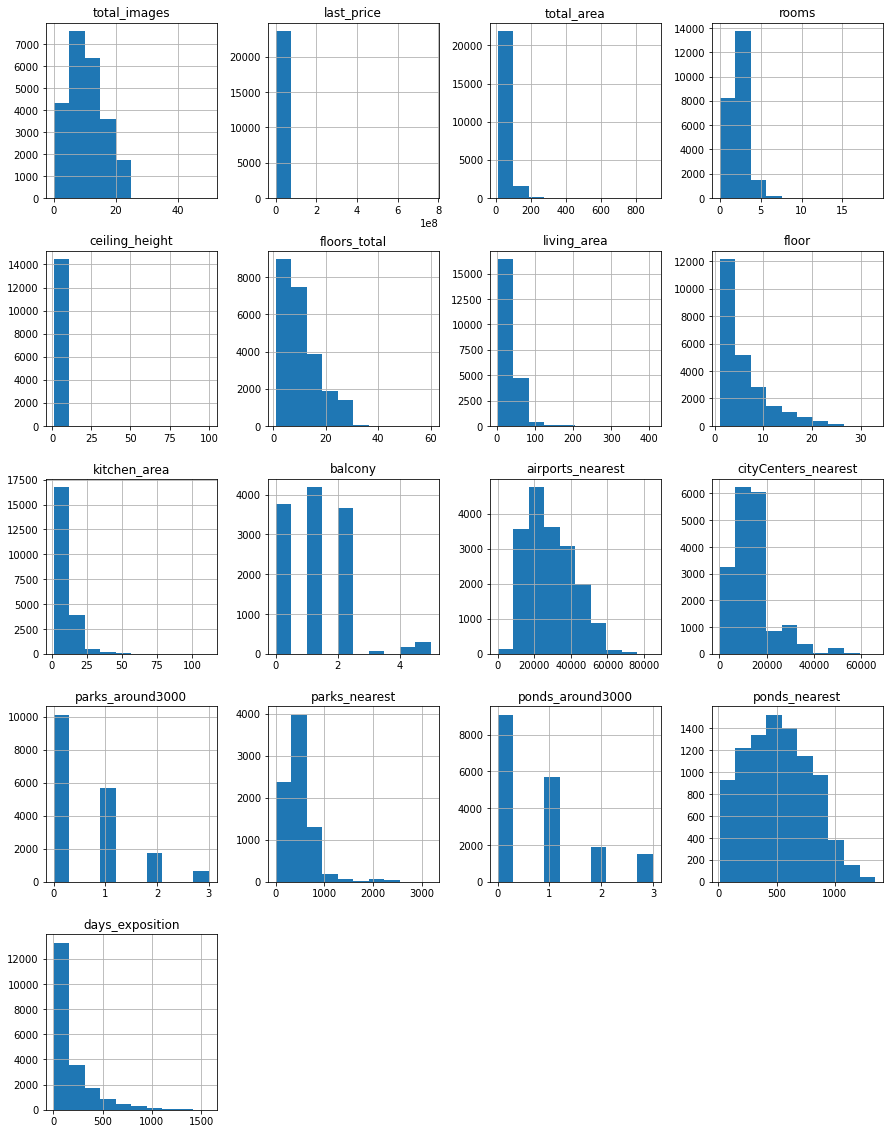

In [5]:
data.hist(figsize=(15, 20));

Изучив исходные данные, имеем следующие выводы:
- Название столбца до центра города написано некорректно;
- Имеются пропуски в столбцах ceiling_height, living_area, is_apartment, kitchen_area, balcony, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition;
- Многие данные, которые должны храниться целыми числами, указаны дробными;
- Стоит изучить столбец с населённым пунктом, в котором находится недвижимость на наличие дубликатов;
- В количестве балконов квартиры возможны аномальные значения.

## Предобработка данных

### Исправление названий стобцов

Название столбца "cityCenters_nearest" некорректное. Переведём его в lower_case и поставим разделительный знак.

In [6]:
data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'}, inplace=True)

### Заполнение пропусков

Определим в каких столбцах датафрейма есть пропуски:

In [7]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Замечена нехватка данных в некоторых квартирах о:

    - Высоте потолка;
    - Этажности здания, в котором находится квартира;
    - Жилплощади;
    - Является ли помещение жилым;
    - Площади кухни;
    - Числе балконов;
    - Названии населённого пункта;
    - Расстоянии до ближайшего аэропорта;
    - Расстоянии до центра города;
    - Расстоянии до ближайшего парка и их количество в радиусе 3км;
    - Расстоянии до ближайшего пруда и их количество в радиусе 3км;
    - Сколько дней было размещено объявление (от публикации до снятия).
    
С целью проведения дальнейшего анализа необходимо заполнить пропуски там, где это возможно. Например, в столбце "балконы" и количестве парков и прудов в радиусе 3км от квартиры. Предположим, что пропуски в этих данных подразумевают отствутие у квартиры указанного объекта (балкона, парка или пруда поблизости) и заполним такие пропуски нулём.

Что касается пропусков этажности здания, в котором находится квартира на продажу - укажем сам этаж нахождения квартиры, как крайний. Вероятно, заполняющий данные из объявления работник, счёл ненужным дублировать этаж квартиры, находящейся на последнем этаже.

In [8]:
data[['balcony', 'parks_around3000', 'ponds_around3000']] = data[['balcony', 'parks_around3000', 'ponds_around3000']].fillna(0)
data['floors_total'] = data['floors_total'].fillna(data['floor'])

Поскольку мы знаем наверняка, какие квартиры в выборке являются студиями, площадь кухни в них так же заменим на 0:

In [9]:
data['kitchen_area'] = data['kitchen_area'].where(data['studio'] == 0, 0)

Чаще всего подобного рода пропуски в данных происходят по причине человеческого фактора. Возможно, работник, заполняющий данные, счёл ненужным указывать 0 в информации о квартирах без балконов и парках/пруда поблизости, ровно как и указать, что в студиях площадь кухни равна 0.

Оставшиеся пропуски в столбцах о жилплощади, высоте потолков, этажности здания и прочих данных, тесно связанных с городом, в котором находится помещение, мы заполним позже.

### Изменение типов данных

Необходимо изучить столбцы с несоответствующими типами данных и исправить их.

In [10]:
data.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment             object
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
city_centers_nearest    float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

Такие данные, как цена на момент публикации, этажность здания, количество близлежащих прудов и парков, балконов, дней с момента размещения публкации объявения о продажи, расстояние до центра/аэропорта указаны дробью (float64), хотя должны быть целыми числами (int64). Для этого создадим список change_list, куда внесём все столбцы, где нужны изменения.

Оставшиеся дробные величины переведём в float32 для экономии памяти.

In [11]:
change_list = ['balcony',
               'floors_total',
               'parks_around3000',
               'ponds_around3000',
               'last_price',
               'days_exposition']

data[change_list] = data[change_list].round(0).astype('Int64')

change_list = ['total_area',
               'ceiling_height',
               'living_area',
               'kitchen_area',
               'airports_nearest',
               'city_centers_nearest',
               'parks_nearest',
               'ponds_nearest'
]
data[change_list] = data[change_list].astype('float32')

**Данные важно хранить в соответствущем формате, чтобы при дальнейшем анализе не возникало ошибок, ведущих к ложным выводам и гипотезам.**

Сперва исправим формат столбца с днём, когда появилось объявление о продаже квартиры.

In [12]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y/%m/%dT%H:%M:%S')

Следующим шагом предобработки данных будет создание нового столбца location_sorted, где будет указано только название населённого пунтка, в котором находится недвижимость, без указания его типа. Это необходимо, чтобы помещения, находящиеся в одном населённом пункте, записаным под разными вариациями (посёлок Мурино и поселок Мурино) корретно учитывались при анализе.

Для удобства создадим список words_to_filter, в котором перечислим все слова, которые удалим из locality_name для формирования нового столбца.

In [13]:
words_to_filter = ['деревня ', 'садовое товарищество ', 'село ', 'городской поселок ', 'поселок станции ', 'поселок при железнодорожной станции ', 'коттеджный поселок ', 'поселок ', 'городского типа ', 'имени ', 'садоводческое некоммерческое товарищество ', ]
data['location_sorted'] = data['locality_name'].str.replace('ё', 'е')
for word in words_to_filter:
    data['location_sorted'] = data['location_sorted'].str.replace(word, '')

### Заполнение оставшихся пропусков

Теперь мы можем корректно отсортировать недвижимость по её принадлежности к населённому пункту. Заполним пропуски у оставшихся единиц недвижимости, по которым отсутствует информация о её местонахождения, словом "Неизвестно" в столбце location_sorted.

In [14]:
data['location_sorted'] = data['location_sorted'].fillna('Неизвестно')

Далее напишем цикл, заменяющий пропуски в столбцах жилплощади и высоты потолков медианным значением по месту принадлежности недвижимости. В случаях, когда медиану по населённому пункту посчитать невозможно, заполним пропуск медианой по всему датафрейму. Мы используем медиану, а не среднюю арифметическую, потому что с помощью медианы можно получить более точные данные и правильнее интерпретировать статистику.

In [15]:
for location in data['location_sorted'].unique():
    # В каждой итерации цикла создаём срез по текущему населённому пункту
    location_data = data.loc[data['location_sorted'] == location]
    # Чтобы не повторять код, создадим функцию:
    def fill_with_median(column):
        # Проверяем, что данные по исследуемому параметру отсутствуют у всех зданий в анализируемом населённом пункте
        if location_data[column].isnull().all():
        # Если да - заменяем в data все пропуски медианой по всему датафрейму
            data.loc[data['location_sorted'] == location, column] = data[column].median()
        else:
        # Если нет - заменяем в data все пропуски медианой по анализируемому населённому пункту
            data.loc[(data['location_sorted'] == location) & (data[column].isna()), column] = \
            location_data[column].median()
    # Вызовем функцию для заполнения пропуска в данных, медиана которых может зависеть от местопоожения
    fill_with_median('ceiling_height')
    fill_with_median('living_area')

Посмотрим на оставшееся количество пропусков.

In [16]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2129
balcony                     0
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
location_sorted             0
dtype: int64

Осталось заполнить пропуски в столбце "площадь кухни". Рассмотрим взаимосвязь общей площади квартиры, жилплощади и площади кухни. Для этого создадим срез area_values из указанных данных и добавим столбец "areas_sum", где будем посчитана сумма площадей кухни и жилой.

In [17]:
area_values = data.pivot_table(index=['total_area'], values=['kitchen_area', 'living_area'])
area_values['areas_sum'] = area_values['kitchen_area'] + area_values['living_area']
area_values.dropna().round(3).head(12)

,kitchen_area,living_area,areas_sum
total_area,,,
14.000000,2.00,11.000,13.000
15.500000,0.00,10.000,10.000
17.000000,1.50,12.500,14.000
18.000000,1.50,15.480,16.980
18.400000,2.40,14.000,16.400
18.799999,0.00,15.800,15.800
19.000000,0.00,23.150,23.150
19.500000,0.00,12.700,12.700
20.000000,3.40,17.225,20.625


Замечена квартира, у которых сумма площадей кухни и жилой больше общей. Уместно исключить её и ей подобные из датафрейма, поскольку это очевидные ошибки. Так же избавимся от квартир с жилплощадью больше, чем общая.

In [18]:
data = data.drop(data.loc[data['total_area'] < (data['kitchen_area'] + data['living_area'])].index)
data = data.drop(data.loc[data['total_area'] < data['living_area']].index)

Заполним пропуски в квартирах до 85 кв.м (допустим, что это наибольшая площадь 4 комнатной квартиры). Предположим, что сумма жилой и кухонной площадей равна общей площади квартиры. Следовательно, имеем формулу:
Площадь кухни =  Площадь квартиры - Жилплощадь. 

In [19]:
data.loc[(data['total_area'] <= 85) & (data['kitchen_area'].isna()), 'kitchen_area'] = \
data['total_area'] - data['living_area']

Посмотрим на оставшееся количество пропусков в площадях кухни.

In [20]:
data['kitchen_area'].isna().sum()

274

Исключим данные 274 квартиры из датафрейма, поскольку:
- для недвижимости с большой площадью будет ошибочно заполнить пропуски выведенной выше формулой;
- квартиры с такой большой площадью могут быть ошибкой при заполнении данных.

In [21]:
data = data.drop(data.loc[data['kitchen_area'].isna()].index)

### Исправление аномальных значений

Начнём с крайних значений цены на недвижимость.

In [22]:
data['last_price'].value_counts().sort_index()

12190        1
430000       2
440000       1
450000       4
470000       3
            ..
289238400    1
300000000    1
330000000    1
401300000    1
420000000    1
Name: last_price, Length: 2873, dtype: Int64

Очевидно, 12190 - ошибочная цена для недвижимости. Уберём строку с этой квартиры из датафрейма.

In [23]:
data = data.drop(data.loc[data['last_price'] == 12190].index)

Далее рассмотрим количества комнат.

In [24]:
data['rooms'].value_counts().sort_values().head(10)

15     1
16     1
19     1
12     1
14     2
11     2
10     3
9      7
8      9
7     52
Name: rooms, dtype: int64

Целесообразно исключить квартиры с количеством комнат более 8, а 0 исправить на 1. Очевидно, это какие-то ошибки, возникшие при сборе/заполнении данных в объявлении.

In [25]:
data = data.drop(data.loc[data['rooms'] >= 8].index).replace(0, 1)

Далее рассмотрим крайние значения высоты потолков.

In [26]:
display(data['ceiling_height'].value_counts().sort_index().head())
data['ceiling_height'].value_counts().sort_index().tail(10)

1.00     1
1.20     1
1.75     1
2.00    11
2.20     1
Name: ceiling_height, dtype: int64

10.3     1
14.0     1
20.0     1
22.6     1
24.0     1
25.0     7
26.0     1
27.0     8
32.0     2
100.0    1
Name: ceiling_height, dtype: int64

Предположим, что в промежутке от 20 до 32м. опечатка, и разделим эти значения на 10. Из этих же соображений уберём из датафрейма квартиры со значениями высоты потолка меньше 2м.

In [27]:
data.loc[data['ceiling_height'] > 10, 'ceiling_height'] = data['ceiling_height'] / 10
data = data.drop(data.loc[(data['ceiling_height'] < 2)].index)

Следующим параметром изучим количество балконов.

In [28]:
data['balcony'].value_counts().sort_index()

1    18998
2     3605
3       79
4      180
5      299
Name: balcony, dtype: Int64

Пять балконов в одной квартире сложно представить. Предположим, что это опечатка и заменим 5 на 4.

In [29]:
data.loc[data['balcony'] > 4, 'balcony'] = 4

Посмотрим, какой процент исходных данных остался после удаления аномалий и ошибок:

In [30]:
data.shape[0] / original_data_shape * 100

97.72986201949449

Наши манипуляции удалили меньше 3% данных. Выборка всё ещё адекватная.

**На этом предобработка данных закончена, можем переходить к анализу данных и созданию новых значений.**

## Проведём анализ данных

### Добавим в датафрейм следующие столбцы:
- цена одного квадратного метра (_square_meter_price_);
- количественное обозначение дня недели публикации объявления (_day_num_);
- месяц публикации объявления (_month_num_);
- год публикации объявления (_year_num_);
- тип этажа квартиры (_floor_type_);
- расстояние до центра города в километрах (_km_to_center_).

In [31]:
data['square_meter_price'] = data['last_price'] / data['total_area']
data['weekday_num'] = data['first_day_exposition'].dt.dayofweek
data['month_num'] = data['first_day_exposition'].dt.month
data['year_num'] = data['first_day_exposition'].dt.year

# Создадим функцию, вычисляющую нахождение квартиры на первом, последнем, или другом этаже
def floor_type_determiner(row):
    if row['floor'] == row['floors_total']:
        return 'последний'
    elif row['floor'] == 1:
        return 'первый'
    else:
        return 'другой'
data['floor_type'] = data.apply(floor_type_determiner, axis=1)
# 
data['km_to_center'] = ( 
    (data['city_centers_nearest']/1000)
    .fillna(0)
    .astype(int)
)

### Исследовательский анализ данных

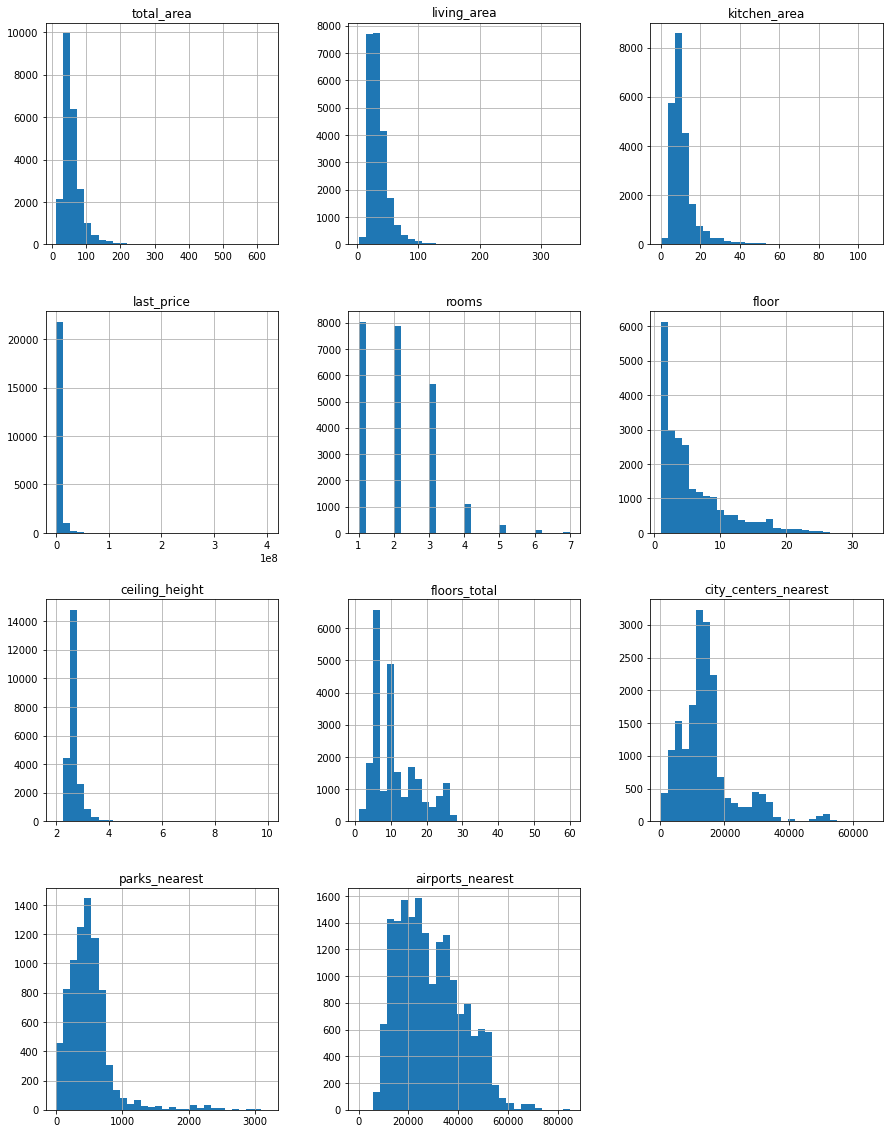

In [32]:
data.hist(column=['total_area', 
                  'living_area', 
                  'kitchen_area', 
                  'last_price',
                  'rooms', 
                  'floor',
                  'ceiling_height', 
                  'floors_total', 
                  'city_centers_nearest',
                  'parks_nearest',
                  'airports_nearest', 
                 ], figsize=(15, 20), bins=30);

Из построенных гистограм имеем выводы, что для большинства продаваемого имущества характерны следующие черты:
- общая площадь до 100 кв.м;
- жилплощадь до 50 кв.м;
- площадь кухни от 2 до 10 кв.м.;
- стоимость до 100 млн. руб.;
- одно- и двухкомнатные;
- с высотой потолков около 2.6 м;
- распологается на первых пяти этажах;
- в 5-ти и 9-ти этажных домах;
- удалено от центра в среднем на 11-15 км;
- находится в 500 метрах от ближайшего парка и 20-22 км от аэропорта.

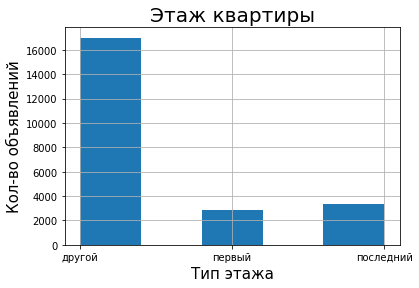

In [33]:
fig, ax = plt.subplots()
ax.hist(data['floor_type'], bins = 5)
ax.grid()
ax.set_title('Этаж квартиры', fontsize = 20)
ax.set_ylabel('Кол-во объявлений', fontsize = 15)
ax.set_xlabel('Тип этажа', fontsize = 15)
plt.show()

Подавляющее большинство квартир на продажу не находится ни на первом, ни на последнем этаже в здании.

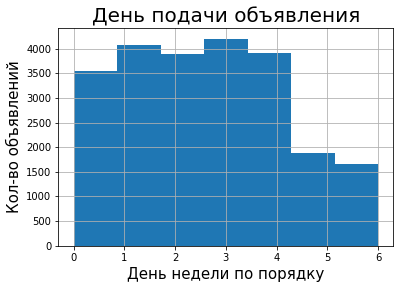

In [34]:
fig, ax = plt.subplots()
ax.hist(data['weekday_num'], bins = 7)
ax.grid()
ax.set_title('День подачи объявления', fontsize = 20)
ax.set_ylabel('Кол-во объявлений', fontsize = 15)
ax.set_xlabel('День недели по порядку', fontsize = 15)
plt.show()

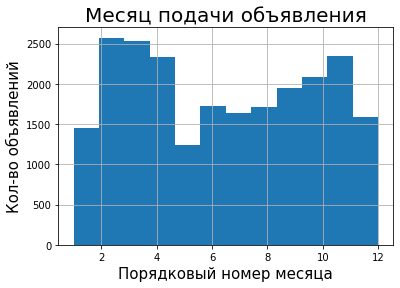

In [35]:
fig, ax = plt.subplots()
ax.hist(data['month_num'], bins = 12)
ax.grid()
ax.set_title('Месяц подачи объявления', fontsize = 20)
ax.set_ylabel('Кол-во объявлений', fontsize = 15)
ax.set_xlabel('Порядковый номер месяца', fontsize = 15)
plt.show()

Чаще всего квартиры выставляют на продажу в будние дни с февраля по апрель, а так же в ноябре.

### Как бысто продаются квартиры

Изучим вопрос скорость продажи квартиры. Построим график на основании имеющихся данных в столбце "days_exposition".

<AxesSubplot:>

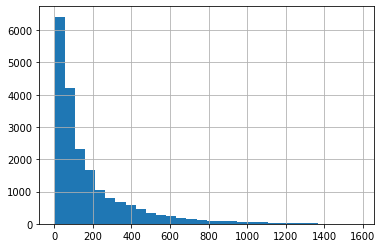

In [36]:
data['days_exposition'].hist(bins=30)

Более 8 тысяч квартир продались за 100 дней, и около 4 тысяч за 200. Посмотрим на среднее арифметическое и медианное значение исследуемого показателя.

In [37]:
display(f"среднее арифметическое: {data['days_exposition'].mean().round(2)}")
f"медианное значение: {data['days_exposition'].median()}"

'среднее арифметическое: 180.73'

'медианное значение: 96.0'

**Итого, недвижимость в датафрейме в среднем продалась за 97 суток.**

Чтобы понять, какой срок продажи недвижимости можно назвать долгим, построим диаграмму с усами.

<AxesSubplot:>

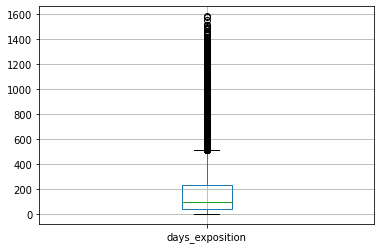

In [38]:
data.boxplot(column='days_exposition')

**Как видно из графика, продажу недвижимости в промежутке от 20 до 220 дней можно назвать быстрой, а 500 дней спустя - чрезвычайно долгой.**

Рассмотрим квартиры, которые продали в диапазоне от 0 до 100 дней:

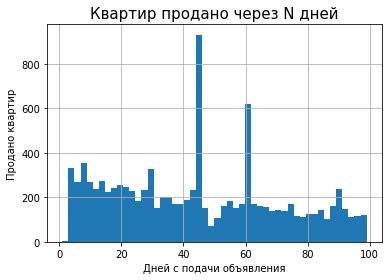

In [39]:
fig, az = plt.subplots()
temp = data.query('days_exposition < 100')
temp = temp['days_exposition']
az.hist(temp, bins = 50)
az.grid()
az.set_title('Квартир продано через N дней', fontsize = 15)
az.set_ylabel('Продано квартир', fontsize = 10)
az.set_xlabel('Дней с подачи объявления', fontsize = 10)
plt.show()

Обнаржуены два пика: в 44-45 и 60-61 дни. К сожалению, автор не смог придумать логического объяснения почему именно через столько дней продано так много квартир. Заместо этого он написал хокку, чтобы добрый ревьюер помог пролить свет на эту тайну.

### Факторы, имеющие наибольшее влияние на стоимость объекта

Изучим, зависит ли цена от:
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).

Для этого построим диаграммы рассеивания и матрицы корреляций.

<AxesSubplot:xlabel='year_num'>

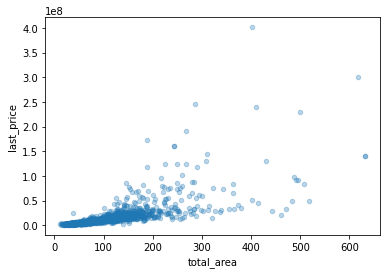

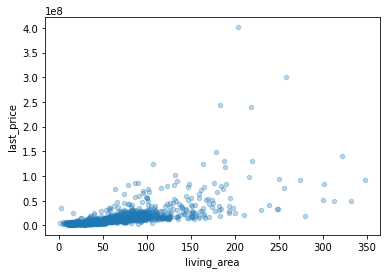

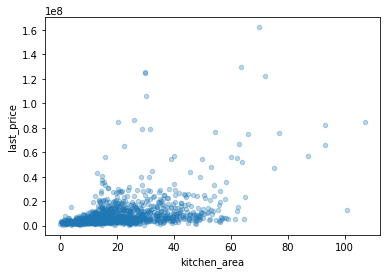

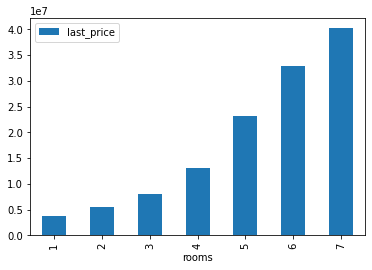

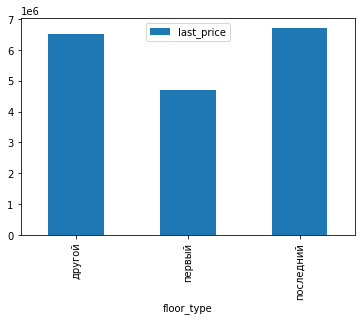

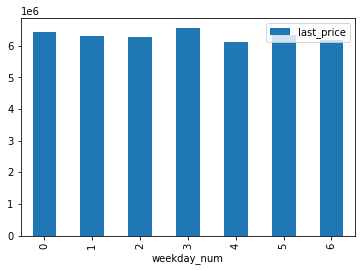

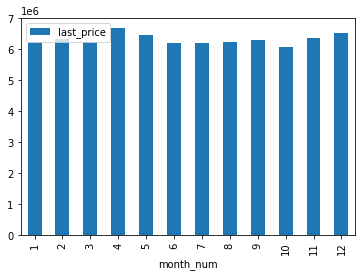

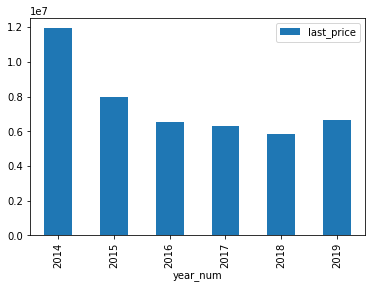

In [40]:
data.pivot_table(index='total_area', values='last_price').reset_index().plot(x='total_area', y='last_price', kind='scatter', alpha=0.3)
data.pivot_table(index='living_area', values='last_price').reset_index().plot(x='living_area', y='last_price', kind='scatter', alpha=0.3)
data.pivot_table(index='kitchen_area', values='last_price').reset_index().plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.3)
data.pivot_table(index='rooms', values='last_price').reset_index().plot(x='rooms', y='last_price', kind='bar')
data.pivot_table(index='floor_type', values='last_price').reset_index().plot(x='floor_type', y='last_price', kind='bar')
data.pivot_table(index='weekday_num', values='last_price').reset_index().plot(x='weekday_num', y='last_price', kind='bar')
data.pivot_table(index='month_num', values='last_price').reset_index().plot(x='month_num', y='last_price', kind='bar')
data.pivot_table(index='year_num', values='last_price').reset_index().plot(x='year_num', y='last_price', kind='bar')

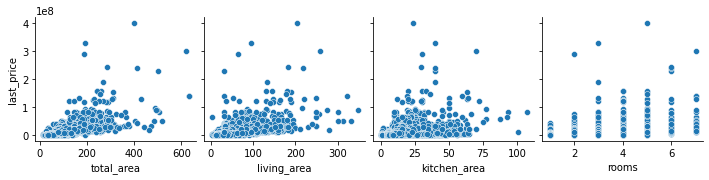

In [41]:
sbn.pairplot(
    data,
    x_vars=["total_area", "living_area", "kitchen_area", 'rooms'],
    y_vars=["last_price"],
);

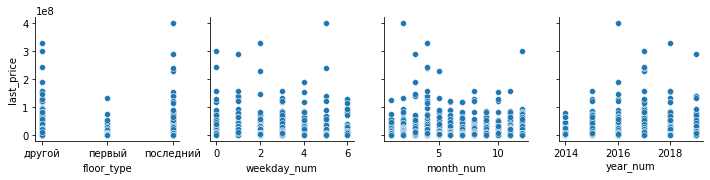

In [42]:
sbn.pairplot(
    data,
    x_vars=['floor_type', 'weekday_num', 'month_num', 'year_num'],
    y_vars=["last_price"],
);

Добавим расчет корреляции для общей цены, общей площади, жилой площади, площади кухни и количества комнат:

In [43]:
data[['last_price', 'total_area', "living_area", "kitchen_area", 'rooms']].corr()

,last_price,total_area,living_area,kitchen_area,rooms
last_price,1.000000,0.686472,0.577546,0.393279,0.378255
total_area,0.686472,1.000000,0.905938,0.487960,0.755133
living_area,0.577546,0.905938,1.000000,0.285201,0.824601
kitchen_area,0.393279,0.487960,0.285201,1.000000,0.238623
rooms,0.378255,0.755133,0.824601,0.238623,1.000000


Исходя из построенных графиков имеем следующие выводы:
- Замечен планомерный рост цены на квартиры с:
  1. площадью до 200 метров квадратных;
  2. жилплощадью до 120 метров квадратных;
  3. площадью кухни до 50 м.кв.;



- доказана зависимость между количеством комнат и ростом цены;
- квартиры на первых этажах значительно дешевле, чем на других этажах;
- зависимости между днём и месяцем публикации объявления о продажи и стоимости недвижимости не обнаружено;
- замечен значительный спад цен с 2014 до 2018 года.
- больше всего (на 68,6%) на цену квартиры влияет общая площадь. Меньше всего (на 37,8%) - количество комнат.


Выведем с помощью графика среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. 

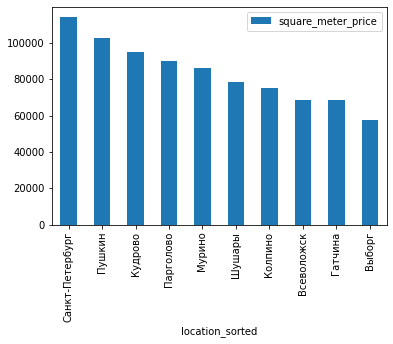

In [44]:
(data
    .query('location_sorted in @data["location_sorted"].value_counts().head(10).index')
    .pivot_table(index='location_sorted', values='square_meter_price', aggfunc='mean')
    .sort_values(by='square_meter_price', ascending=False)
    .plot(kind='bar')
);

Итого, наибольшая медианная цена за кв.м. из выбраных городов присуща Санкт-Петербургу (114126 руб.), а наименьшая Выборгу - (57810 руб.)

Опишем с помощью графику зависимость цены от удалённости квартиры от центра в Санкт-Питербурге.

<AxesSubplot:xlabel='km_to_center'>

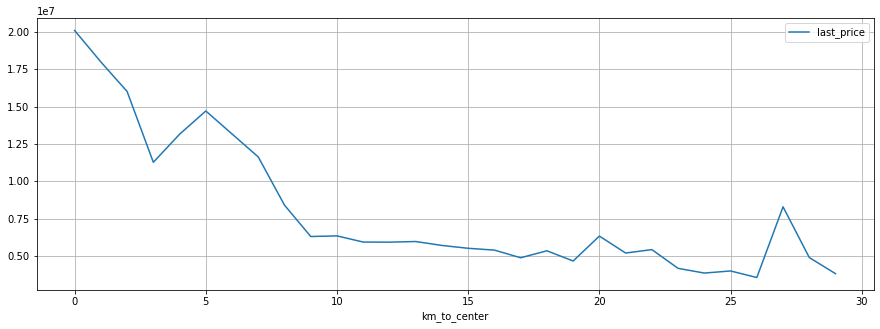

In [45]:
(data
 .query('location_sorted == "Санкт-Петербург"')
 .pivot_table(index='km_to_center', values='last_price')
 .plot(figsize=(15, 5), grid=True)
)

Выявлен спад на стоимость квартиры при удалении от центра с двумя аномальными скачками: на 5 и 27 км от центра. Это может быть связано с близостью к главным веткам метро, или обилием популярных мест в этой протяжённости.

## Общий вывод

С целью определния факторов, влияющих на цену квартиры, были проаналзированы следующие факторы:
  - общая площадь;
  - жилая площадь;
  - площадь кухни;
  - цена объекта;
  - количество комнат;
  - высота потолков;
  - этаж квартиры;
  - тип этажа квартиры («первый», «последний», «другой»);
  - общее количество этажей в доме;
  - расстояние до центра города в метрах;
  - расстояние до ближайшего аэропорта;
  - расстояние до ближайшего парка;
  - день и месяц публикации объявления.
  
На этапе предобработки данные были переведены в правильный формат, пропуски заполнены наиболее подходящими значениями, а аномальные значения вычислины и удалены для избежания ошибок в дальнейшем анализе. Всего удалено менее 3% от изначальной выборки. Далее мы расчитали расстояние от центра города до продаваемой недвижимости в километрах, и все квартиры сгруппировали по этажу, на котором она находится: "первый", "последний" и "другой".

На основании наиболее значимых показателей построены гистограмы, и получены выводы:
- Большинству квартир присущи следующие черты:
    - общая площадь до 100 кв.м;
    - жилплощадь до 50 кв.м;
    - площадь кухни от 2 до 10 кв.м.;
    - стоимость до 100 млн. руб.;
    - одно- или двухкомнатные;
    - высота потолков около 2.6 м;
    - распологается на первых пяти этажах;
    - в 5-ти и 9-ти этажных домах;
    - удалены от центра в среднем на 11-15 км;
    - находятся в 500 метрах от ближайшего парка и 20-22 км от аэропорта.


- Замечен планомерный рост цены на квартиры с:
    - площадью до 200 метров квадратных;
    - жилплощадью до 120 метров квадратных;
    - площадью кухни в до 50 м.кв.;

- Продажу недвижимости в промежутке от 20 до 220 дней можно назвать быстрой, а 500 дней спустя - чрезвычайно долгой. В среднем квартиру покупают за 97 суток;
- За первые 100 дней продажи квартиры чаще всего покупают в 44-45 и 60-61 дни;
- Доказана зависимость между количеством комнат и ростом цены;
- Квартиры на первых этажах значительно дешевле, чем на других этажах;
- Зависимости между днём и месяцем публикации объявления о продажи и стоимости недвижимости не обнаружено;
- Замечен значительный спад цен с 2014 до 2018 года;
- Больше всего (на 68,6%) на цену квартиры влияет общая площадь. Меньше всего (на 37,8%) - количество комнат;
- Наибольшая медианная цена за квадратный метр из десяти самых популярных для продажи недвижимости городов присуща Санкт-Петербургу (114126 руб.), а наименьшая Выборгу - 57810 руб.